In [1]:
# Здесь будет существовать некоторая версия программы для обработки экпериментальных данных
# На начальный момент самая работающая версия программы: lab 2.4.1.ipynb

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import cross_validation, linear_model, metrics
import numpy as np
import pandas as pd
from scipy import optimize as opt

In [3]:
# For ODR regression

import matplotlib.pyplot as plt
import scipy.odr as odr

In [4]:
# Считывание данных

source_data = pd.read_csv('Tup.csv', sep=',', header=0) #source_data.csv
source_data = source_data.sample(frac=1)

In [5]:
# Кусок для получения измерений

source_data_1 = source_data.H1
source_data_2 = source_data.H2
source_data_3 = source_data.Temp

In [6]:
# Кусок для подгона полученных измерений под тип данных

data_1 = np.array(source_data_1, dtype=float)     
data_2 = np.array(source_data_2, dtype=float)
data_3 = np.array(source_data_3, dtype=float)

In [7]:
# Кусок для подгона полученных измерений под апроксимацию

data_y = data_2 - data_1
data_x = (data_3 + 273.15)

data_y = np.log(data_y)
data_x = np.reciprocal(data_x)


In [8]:
print(data_x)
print(data_y)


[ 0.00328785  0.00324517  0.00323468  0.0033206   0.00333167  0.00326637
  0.00319336  0.00327708  0.00325574  0.00321388  0.0033428   0.00330961
  0.00335402  0.00322425  0.00320359  0.0033653   0.0032987 ]
[ 1.20896035  1.44926916  1.5018527   1.0612565   0.99694863  1.327075
  1.69377906  1.26412673  1.38629436  1.59330853  0.9439059   1.10856262
  0.87129337  1.54756251  1.65822808  0.85866162  1.16315081]


In [9]:
# Кусок для получения ошибки измерений

#  source_data_error_1 = 
# source_data_error_2 = 
# source_data_error_3 = 

In [11]:
# Кусок для подгона полученных ошибок измерений под тип данных (подумать о глубокой реализации)

data_error_x = 0.0001*np.ones((1,17))
data_error_y = 0.01*np.ones((1,17))
print(data_error_x[0][:])
print(data_error_y[0][:])

[ 0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001
  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001]
[ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01]


In [12]:
# Подгон формата данных под работу

data_x = np.array(data_x).reshape((len(data_x), 1))

# Для многомерной регрессии

#data_4 = np.array(data_4).reshape((len(data_4), 1))
#data_x = np.hstack([data_x, data_4])

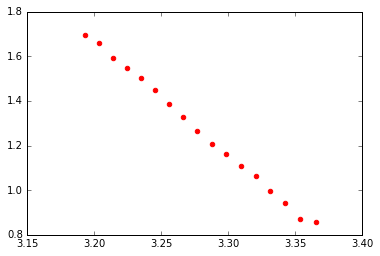

In [15]:
# График

pylab.scatter(1000*data_x, data_y, color = 'r')

#### LinearRegression

In [16]:
# Обучение

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(data_x, data_y)
regressor_predictions = linear_regressor.predict(data_x)

In [19]:
# Результаты линейной регрессии
print("y = {:.2f} + ({:.2f})*x".format(linear_regressor.intercept_, linear_regressor.coef_[0]))

y = 17.86 + (-5060.63)*x


In [21]:
# Итоговые значения линейной регрессии

print(regressor_predictions)
print(data_y)

[ 1.22235256  1.43833292  1.49145473  1.05660207  1.0006156   1.33104821
  1.70054922  1.27687849  1.38486521  1.59667398  0.94425484  1.11221795
  0.887516    1.54423398  1.64877799  0.83039527  1.1674669 ]
[ 1.20896035  1.44926916  1.5018527   1.0612565   0.99694863  1.327075
  1.69377906  1.26412673  1.38629436  1.59330853  0.9439059   1.10856262
  0.87129337  1.54756251  1.65822808  0.85866162  1.16315081]


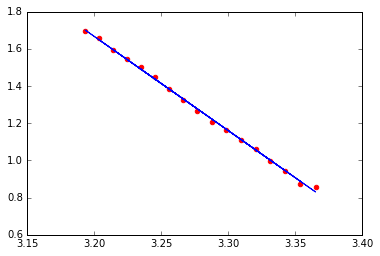

In [25]:
# График результата

regressor_predictions = np.array(regressor_predictions).reshape((len(regressor_predictions), 1))
pylab.scatter(1000*data_x, data_y, color = 'r')
pylab.plot(1000*data_x, regressor_predictions, color = 'b')

#### Lasso (L1)

In [26]:
# Обучение (alpha - параметр L1 регуляризации)

lasso_regressor = linear_model.Lasso(random_state = 3, alpha=0.0000001)
lasso_regressor.fit(data_x, data_y)
lasso_predictions = lasso_regressor.predict(data_x)

In [28]:
# Результаты лассо регрессии 

print("y = {:.2f} + ({:.2f})*x".format(lasso_regressor.intercept_, lasso_regressor.coef_[0]))

y = 17.74 + (-5024.54)*x


In [29]:
# Итоговые значения лассо регрессии

print(lasso_predictions)
print(data_y)

[ 1.22271089  1.4371511   1.4898941   1.05814236  1.00255513  1.33063144
  1.69749754  1.276848    1.38406467  1.59436304  0.94659627  1.11336164
  0.89026203  1.54229698  1.64609549  0.83354863  1.16821662]
[ 1.20896035  1.44926916  1.5018527   1.0612565   0.99694863  1.327075
  1.69377906  1.26412673  1.38629436  1.59330853  0.9439059   1.10856262
  0.87129337  1.54756251  1.65822808  0.85866162  1.16315081]


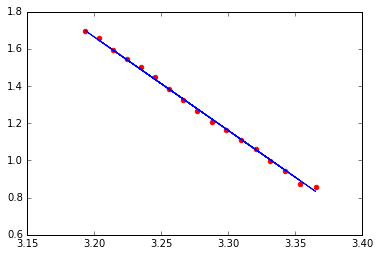

In [30]:
# График результата

lasso_predictions = np.array(lasso_predictions).reshape((len(lasso_predictions), 1))
pylab.scatter(1000*data_x, data_y, color = 'r')
pylab.plot(1000*data_x, lasso_predictions, color = 'b')

#### ElasticNet (L2)

In [31]:
# Обучение (alpha - параметр L1 регуляризации)

elastic_regressor = linear_model.ElasticNet(random_state = 3, alpha=0.0000000001, l1_ratio = 0.0)
elastic_regressor.fit(data_x, data_y)
elastic_predictions = elastic_regressor.predict(data_x)

/Users/heyfaraday/anaconda/envs/New_Python/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/heyfaraday/anaconda/envs/New_Python/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [33]:
# Результаты ElasticNet регрессии 

print("y = {:.2f} + ({:.2f})*x".format(elastic_regressor.intercept_, elastic_regressor.coef_[0]))

y = 17.28 + (-4884.36)*x


In [32]:
# Итоговые значения ElasticNet регрессии

print(elastic_predictions)
print(data_y)

[ 1.22410276  1.43256048  1.48383205  1.0641254   1.01008895  1.32901252
  1.68564373  1.27672954  1.38095507  1.58538649  0.95569124  1.11780416
  0.90092863  1.53477299  1.6356757   0.84579743  1.17112879]
[ 1.20896035  1.44926916  1.5018527   1.0612565   0.99694863  1.327075
  1.69377906  1.26412673  1.38629436  1.59330853  0.9439059   1.10856262
  0.87129337  1.54756251  1.65822808  0.85866162  1.16315081]


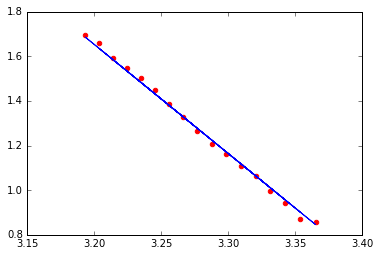

In [34]:
# График результата

elastic_predictions = np.array(elastic_predictions).reshape((len(elastic_predictions), 1))
pylab.scatter(1000*data_x, data_y, color = 'r')
pylab.plot(1000*data_x, elastic_predictions, color = 'b')

#### Curve fit (without sigma)

In [35]:
data_x = np.reshape(data_x, (1, len(data_x)))

In [36]:
# Определение функции ошибки

def f(x, a, b):
    return a + b*x

In [37]:
# Оптимизация

parameters_opt, parameters_cov = opt.curve_fit(f, data_x[0], data_y)

In [38]:
# Результаты оптимизации

print("y  =  {:.3f}  +      ({:.3f})*x".format(parameters_opt[0], parameters_opt[1]))
print("  (+-){:.3f}   +  (+-)({:.3f})*x".format(np.sqrt(np.diag(parameters_cov))[0], 
                                                np.sqrt(np.diag(parameters_cov))[1]))

y  =  17.861  +      (-5060.626)*x
  (+-)0.169   +  (+-)(51.504)*x


#### Curve fit (with sigma)

In [39]:
# Определение функции ошибки

def f(x, a, b):
    return a + b*x

In [40]:
# Оптимизация 

parameters_sigma_opt, parameters_sigma_cov = opt.curve_fit(f, data_x[0], data_y, sigma = data_error_y[0], absolute_sigma=True)

In [41]:
# Результаты оптимизации

print("y  =  {:.3f}  +      ({:.3f})*x".format(parameters_sigma_opt[0], parameters_sigma_opt[1]))
print("  (+-){:.3f}   +  (+-)({:.3f})*x".format(np.sqrt(np.diag(parameters_sigma_cov))[0], 
                                                np.sqrt(np.diag(parameters_sigma_cov))[1]))

y  =  17.861  +      (-5060.626)*x
  (+-)0.151   +  (+-)(46.074)*x


#### Orthogonal distance regression

Beta: [   17.88670272 -5068.48583609]
Beta Std Error: [  0.16911024  51.58404538]
Beta Covariance: [[  5.87236075e+01  -1.79102770e+04]
 [ -1.79102770e+04   5.46391198e+06]]
Residual Variance: 0.00048699791463889395
Inverse Condition #: 0.0005095654526944618
Reason(s) for Halting:
  Sum of squares convergence


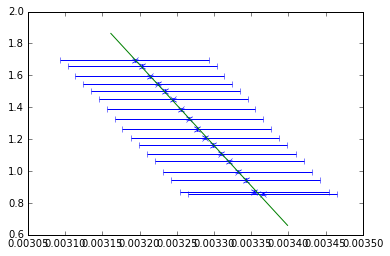

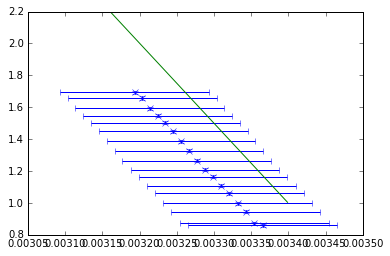

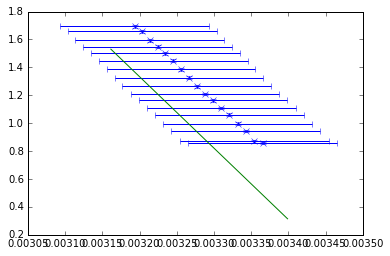

In [42]:
def linear_func(b, x):
     return b[1]*x + b[0]

linear_model = odr.Model(linear_func)

data = odr.RealData(data_x[0][:], data_y, sx=data_error_x, sy=data_error_y)

my_odr = odr.ODR(data, linear_model, beta0=[0., 1.])

out = my_odr.run()

out.pprint()
'''Beta: [ 1.01781493  0.48498006]
Beta Std Error: [ 0.00390799  0.03660941]
Beta Covariance: [[ 0.00241322 -0.01420883]
 [-0.01420883  0.21177597]]
Residual Variance: 0.00632861634898189
Inverse Condition #: 0.4195196193536024
Reason(s) for Halting:
  Sum of squares convergence'''

x_fit = np.linspace(0.99*min(data_x[0]), 1.01*max(data_x[0]), 10000)

plt.errorbar(data_x[0][:], data_y, xerr=data_error_x[0][:], yerr=data_error_y[0][:], linestyle='None', marker='x')
plt.plot(x_fit, linear_func(out.beta, x_fit))
plt.show()

out.beta = out.beta + out.sd_beta

plt.errorbar(data_x[0][:], data_y, xerr=data_error_x[0][:], yerr=data_error_y[0][:], linestyle='None', marker='x')
plt.plot(x_fit, linear_func(out.beta, x_fit))
plt.show()

out.beta = out.beta - 2*out.sd_beta

plt.errorbar(data_x[0][:], data_y, xerr=data_error_x[0][:], yerr=data_error_y[0][:], linestyle='None', marker='x')
plt.plot(x_fit, linear_func(out.beta, x_fit))
plt.show()

#### Error and statistic

In [44]:
# Ошибки линейной регрессии

print ("Ошибки линейной регрессии:")
print("Абсолютная ошибка:", metrics.mean_absolute_error(data_y, regressor_predictions))
print("Среднеквадратичная ошибка:", sqrt(metrics.mean_squared_error(data_y, regressor_predictions)))
print("Доля объяснённой ошибки:", metrics.explained_variance_score(data_y, regressor_predictions))
print("Медианная ошибка:", metrics.median_absolute_error(data_y, regressor_predictions))
print("R2 scorer:", metrics.r2_score(data_y, regressor_predictions))

Ошибки линейной регрессии
Абсолютная ошибка: 0.00805444204947
Среднеквадратичная ошибка: 0.0105005152871
Доля объяснённой ошибки: 0.998448717732
Медианная ошибка: 0.00465443316931
R2 scorer: 0.998448717732


In [45]:
# Ошибки лассо регрессии

print ("Ошибки лассо регрессии:")
print ("Абсолютная ошибка:", metrics.mean_absolute_error(data_y, lasso_predictions))
print ("Среднеквадратичная ошибка:", sqrt(metrics.mean_squared_error(data_y, lasso_predictions)))
print ("Доля объяснённой ошибки:", metrics.explained_variance_score(data_y, lasso_predictions))
print ("Медианная ошибка:", metrics.median_absolute_error(data_y, lasso_predictions))
print ("R2 scorer:", metrics.r2_score(data_y, lasso_predictions))

Ошибки лассо регрессии:
Абсолютная ошибка: 0.00846254059526
Среднеквадратичная ошибка: 0.0106709668956
Доля объяснённой ошибки: 0.998397946
Медианная ошибка: 0.00526552437756
R2 scorer: 0.998397946


In [46]:
# Ошибки ElasticNet регрессии

print ("Ошибки ElasticNet регрессии:")
print ("Абсолютная ошибка:", metrics.mean_absolute_error(data_y, elastic_predictions))
print ("Среднеквадратичная ошибка:", sqrt(metrics.mean_squared_error(data_y, elastic_predictions)))
print ("Доля объяснённой ошибки:", metrics.explained_variance_score(data_y, elastic_predictions))
print ("Медианная ошибка:", metrics.median_absolute_error(data_y, elastic_predictions))
print ("R2 scorer:", metrics.r2_score(data_y, elastic_predictions))

Ошибки ElasticNet регрессии:
Абсолютная ошибка: 0.0122743631584
Среднеквадратичная ошибка: 0.0140126342538
Доля объяснённой ошибки: 0.997237456162
Медианная ошибка: 0.0126028160637
R2 scorer: 0.997237456162


In [ ]:
# Статистики для curve_fit и ODR приведены выше

In [ ]:
# sklearn.feature_selection.chi2 или наподобии критерия Пирсона для регресси

#### Хотелось бы, но работает и так неплохо

In [ ]:
# Отмаштабировать значения в регрессии